In [1]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
import random

warnings.filterwarnings("ignore")

In [2]:
drive.mount('/content/drive')
path = 'drive/MyDrive/ASD_Research/'
data = pd.read_csv(path + 'combined.csv')
x_vals = data.iloc[:, 0:14]
y_vals = data.iloc[:, 14]

Mounted at /content/drive


In [10]:
x_train, x_test, y_train, y_test = train_test_split(
      x_vals, y_vals, test_size=0.2, random_state=345712
)

xgb_model = XGBClassifier(
    subsample = 0.9,
    scale_pos_weight =  1,
    n_estimators = 100,
    min_child_weight = 1,
    max_depth = 7,
    learning_rate = 0.25,
    max_bin = 256,
    gamma = 0.1,
    colsample_bytree = 0.7,
    random_state = 155993
)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(accuracy_xgb)

0.9499036608863198


In [11]:
features = x_train.columns
importances = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
})
print(feature_importance_df)

      Feature  Importance
0          A1    0.072797
1          A2    0.039879
2          A3    0.026053
3          A4    0.062618
4          A5    0.063664
5          A6    0.168539
6          A7    0.047505
7          A8    0.034137
8          A9    0.077348
9         A10    0.039707
10        Age    0.060746
11        Sex    0.147909
12  Ethnicity    0.083905
13   Jaundice    0.075195


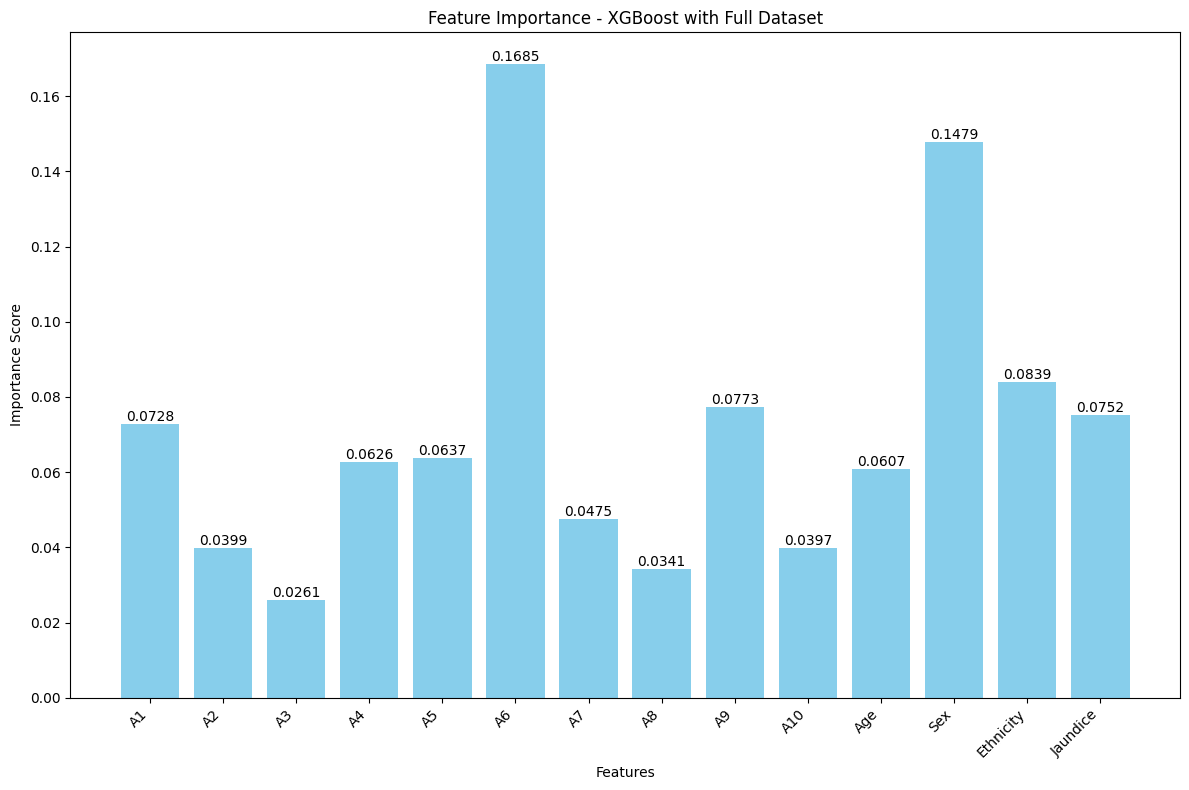

In [12]:
import numpy as np

# Extract feature importance
feature_importances_xgb = xgb_model.feature_importances_

# Plot bar graph of feature importance
plt.figure(figsize=(12, 8))
bars = plt.bar(x_vals.columns, feature_importances_xgb, color='skyblue')

# Annotate bars with actual values
for bar, importance in zip(bars, feature_importances_xgb):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{importance:.4f}', ha='center', va='bottom')

plt.title("Feature Importance - XGBoost with Full Dataset")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

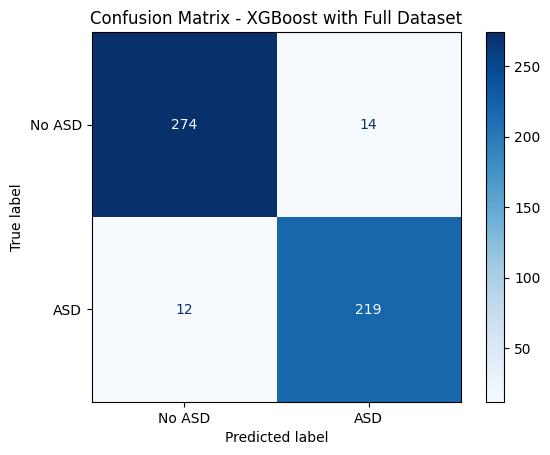

Classification Report:
              precision    recall  f1-score   support

      No ASD       0.96      0.95      0.95       288
         ASD       0.94      0.95      0.94       231

    accuracy                           0.95       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.95      0.95      0.95       519



In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No ASD", "ASD"])

# Plot Confusion Matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost with Full Dataset")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=["No ASD", "ASD"]))